In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt
%matplotlib inline

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

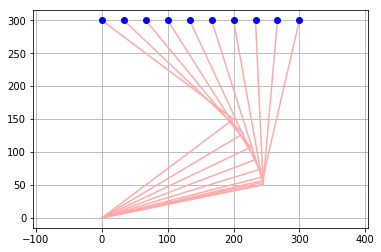

In [2]:
l1,l2 = 250, 250
T1 = []
T2 = []
y = 300

for x in np.linspace(0,300,10):
    K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = arctan2(sqrt(1-(K**2)), K)
    t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))
    T1.append(t1)
    T2.append(t2)
    # FK
    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0,T2_1)
    A = np.array([T1_0[0][3],T1_0[1][3]])
    B = np.array([T2_0[0][3],T2_0[1][3]])
    plt.plot([0,A[0],B[0]],[0,A[1],B[1]],'#FFAAAA')
    plt.plot(B[0],B[1],'bo')
    plt.grid('on')
    plt.axis('equal');

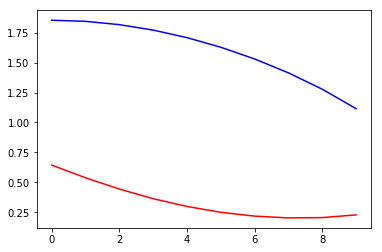

In [33]:
plt.plot(T1,'r')
plt.plot(T2,'b')

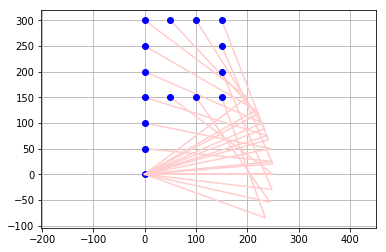

In [34]:
l1,l2 = 250, 250
T1, T2 = [], []
y = 300
puntos = [(0,0),(0,50),(0,100),(0,150),(0,200),(0,250),(0,300),
          (50,300),(100,300),(150,300),
          (150,250),(150,200),(150,150),
          (100,150),(50,150)]

for punto in puntos:
    x,y = punto[0], punto[1]
    K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
    t2 = arctan2(sqrt(1-(K**2)), K)
    t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))
    T1.append(t1)
    T2.append(t2)
    # FK
    T1_0 = dh(l1,0,0,t1)
    T2_1 = dh(l2,0,0,t2)
    T2_0 = np.dot(T1_0,T2_1)
    A = np.array([T1_0[0][3],T1_0[1][3]])
    B = np.array([T2_0[0][3],T2_0[1][3]])
    plt.plot([0,A[0],B[0]],[0,A[1],B[1]],'#FFCCCC')
    plt.plot(B[0],B[1],'bo')
    plt.grid('on')
    plt.axis('equal');

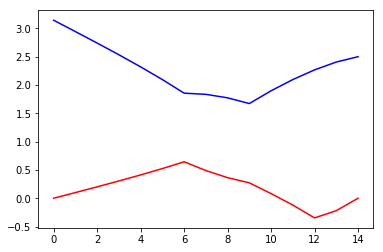

In [35]:
plt.plot(T1,'r')
plt.plot(T2,'b')

In [36]:
T1 = np.column_stack((range(len(T1)),T1))
T2 = np.column_stack((range(len(T2)),T2))
np.savetxt("T1.dat", T1, fmt='%0.6f',delimiter=",")
np.savetxt("T2.dat", T2, fmt='%0.6f',delimiter=",")